Saving devi.jpg to devi (2).jpg


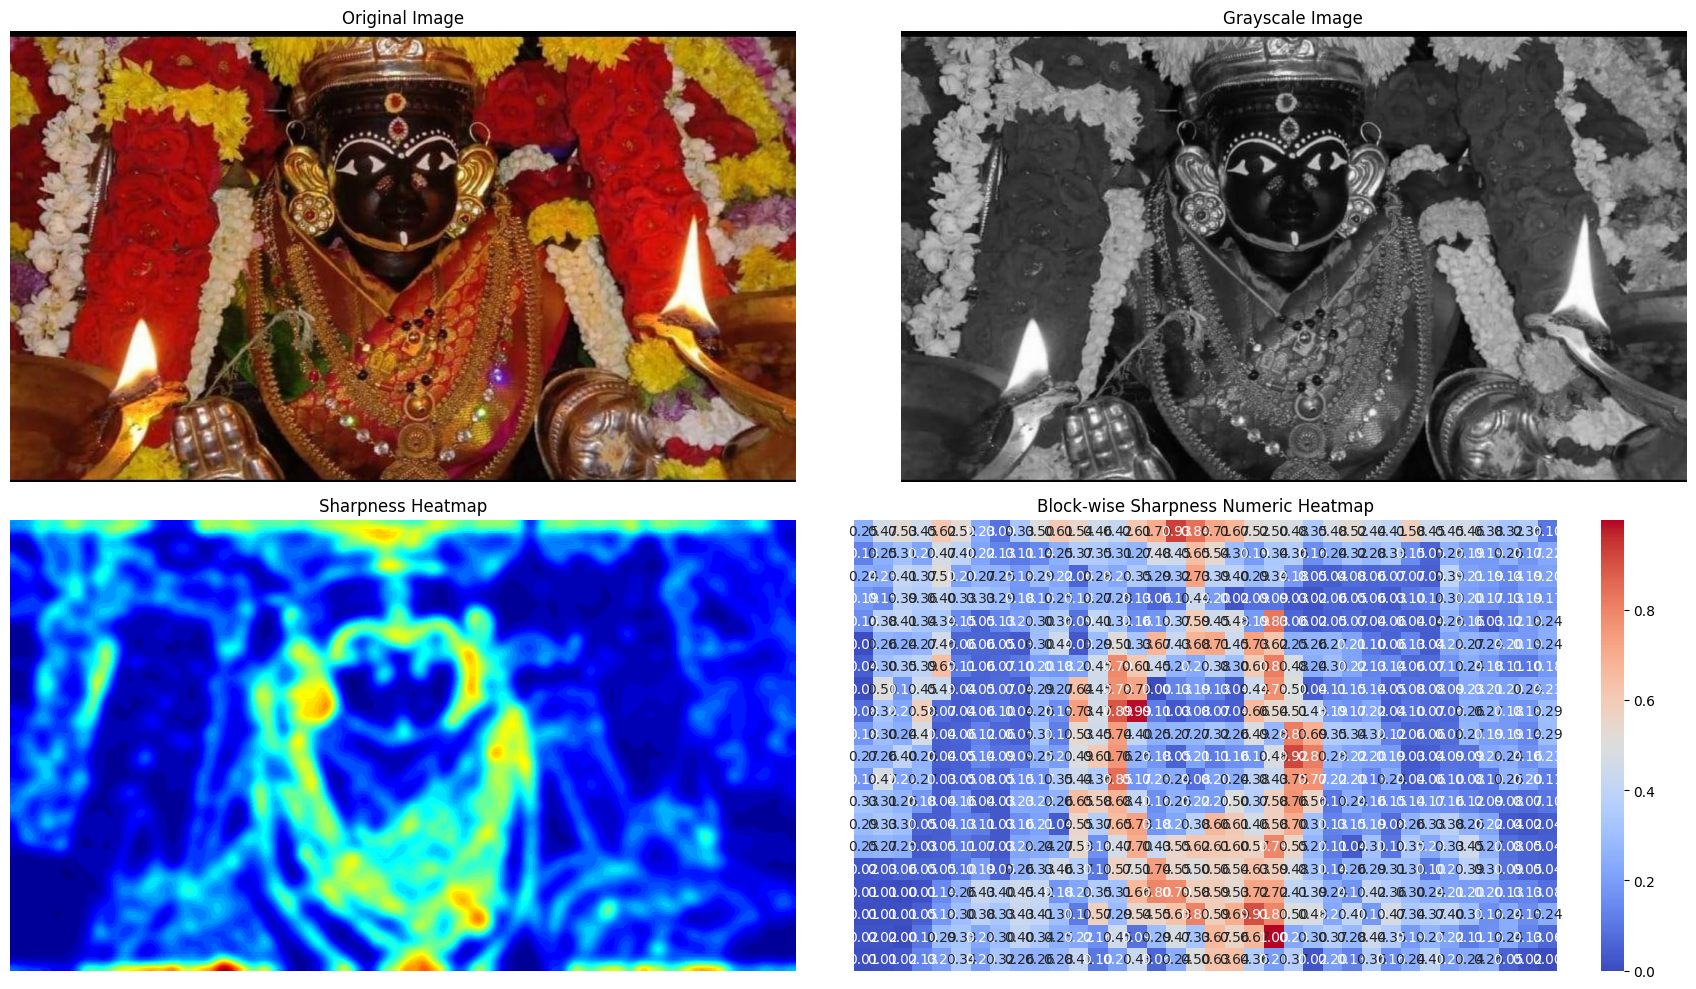

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# FUNCTION 1: Heatmap(Sharpness)

def style_heatmap(gray):

    # Laplacian for sharpness
    sharpness = cv2.Laplacian(gray, cv2.CV_64F)
    sharpness = np.abs(sharpness)

    # Normalize contrast
    sharpness = cv2.normalize(sharpness, None, 0, 255, cv2.NORM_MINMAX)
    sharpness = np.uint8(sharpness)

    # Smooth the heatmap
    smoothed = cv2.GaussianBlur(sharpness, (55,55), 0)

    # Normalize again
    smoothed = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX)
    smoothed = np.uint8(smoothed)

    # Apply (JET) heatmap
    heatmap = cv2.applyColorMap(smoothed, cv2.COLORMAP_JET)

    return sharpness, heatmap


# FUNCTION 2: Numeric Heatmap (block-wise)

def numeric_heatmap(gray, block_size=30):
    sharp = cv2.Laplacian(gray, cv2.CV_64F)
    sharp = np.abs(sharp)

    h, w = sharp.shape
    rows = h // block_size
    cols = w // block_size

    matrix = np.zeros((rows, cols))

    for i in range(rows):
        for j in range(cols):
            block = sharp[i*block_size:(i+1)*block_size,
                          j*block_size:(j+1)*block_size]
            matrix[i, j] = np.mean(block)

    norm_matrix = (matrix - np.min(matrix)) / (np.max(matrix) - np.min(matrix) + 1e-6)

    return norm_matrix


# --------------------------
# MAIN EXECUTION
# --------------------------

# Upload the image
from google.colab import files
uploaded = files.upload()

# Get uploaded filename
image_path = list(uploaded.keys())[0]

# Load image
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Get heatmaps
sharp_raw, sharp_heatmap = style_heatmap(gray)
numeric_matrix = numeric_heatmap(gray, block_size=30)

# --------------------------
# DISPLAY ALL OUTPUTS
# --------------------------

plt.figure(figsize=(18,10))

# 1. Original
plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

# 2. Grayscale
plt.subplot(2,2,2)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

# 3. Style Heatmap
plt.subplot(2,2,3)
plt.title("Sharpness Heatmap")
plt.imshow(cv2.cvtColor(sharp_heatmap, cv2.COLOR_BGR2RGB))
plt.axis("off")

# 4. Numeric Block-wise Heatmap
plt.subplot(2,2,4)
plt.title("Block-wise Sharpness Numeric Heatmap")
sns.heatmap(numeric_matrix, cmap="coolwarm", annot=True, fmt=".2f", cbar=True)
plt.axis("off")

plt.tight_layout()
plt.show()


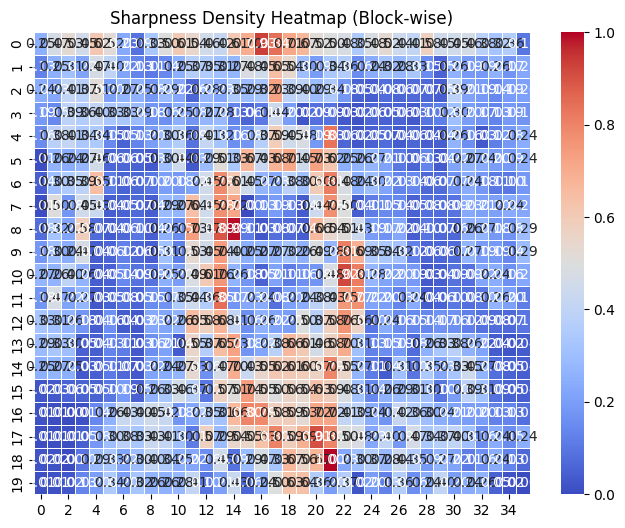

array([[ 8.34444444, 14.49      , 15.98666667, 14.00444444, 18.53666667,
        15.74111111,  7.73888889,  3.71222222, 10.65      , 15.35333333,
        18.26333333, 16.49888889, 14.06666667, 13.04333333, 18.31222222,
        20.77      , 27.33222222, 24.81666667, 21.23333333, 20.05555556,
        15.79666667, 15.23444444, 14.63444444, 10.95222222, 14.68111111,
        15.94444444, 13.68111111, 12.68777778, 17.43333333, 13.75222222,
        13.95777778, 14.21      , 11.98      , 10.26888889, 11.41555556,
         4.08222222],
       [ 4.86777778,  8.17555556, 10.02111111,  7.36111111, 14.50888889,
        12.40888889,  7.30222222,  4.97555556,  4.32888889,  5.24      ,
         8.36555556, 11.51111111, 11.15      ,  9.85      ,  8.92444444,
        14.83      , 13.92222222, 19.39444444, 16.27555556,  9.66      ,
         6.63333333, 10.76666667, 11.36111111,  5.62666667,  7.97444444,
        10.21444444,  9.07333333, 10.49777778,  5.43555556,  2.80222222,
         8.52111111,  6.52888

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sharpness_numeric_heatmap(image_path, block_size=30):
    # Load image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Laplacian sharpness
    sharp = cv2.Laplacian(gray, cv2.CV_64F)
    sharp = np.abs(sharp)

    h, w = sharp.shape

    # Calculate number of blocks
    rows = h // block_size
    cols = w // block_size

    # Matrix to store average sharpness per block
    heatmap_matrix = np.zeros((rows, cols))

    # Fill matrix
    for i in range(rows):
        for j in range(cols):
            block = sharp[i*block_size:(i+1)*block_size,
                          j*block_size:(j+1)*block_size]
            heatmap_matrix[i, j] = np.mean(block)

    # Normalize to 0-1 for heatmap
    heatmap_norm = (heatmap_matrix - np.min(heatmap_matrix)) / (np.max(heatmap_matrix) - np.min(heatmap_matrix))

    # Plot heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(
        heatmap_norm,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        linewidths=0.5,
        cbar=True
    )
    plt.title("Sharpness Density Heatmap (Block-wise)")
    plt.show()

    return heatmap_matrix

# Run the function
sharpness_numeric_heatmap("/content/devi (1).jpg", block_size=30)
